In [ ]:
import PyPDF2
import re

def extract_invoice_data(pdf_path):
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        page = reader.pages[0]
        text = page.extract_text()

        # Regular expressions to match each piece of data
        date_re = r'DATE\n(\d{2}/\d{2}/\d{4})'
        invoice_number_re = r'INVOICE #\n(\d+)'
        bill_to_re = r'BILL TO\n\n(.+?)(?:\n\d{3}-\d{3}-\d{4})'
        activity_re = r'(\d{3}-\d{3}-\d{4})\n(.+?)Amount'
        total_re = r'TOTAL\n\n\$(\d+\.\d{2})'
        balance_due_re = r'BALANCE DUE \n\n\$(\d+\.\d{2})'

        # Extracting data
        date = re.search(date_re, text).group(1)
        invoice_number = re.search(invoice_number_re, text).group(1)
        bill_to = re.search(bill_to_re, text, re.DOTALL).group(1).strip()
        activity = re.search(activity_re, text, re.DOTALL).group(2).strip()
        total = re.search(total_re, text).group(1)
        balance_due = re.search(balance_due_re, text).group(1)

        return {
            'Date': date,
            'Invoice Number': invoice_number,
            'Bill To': bill_to,
            'Activity': activity,
            'Total': total,
            'Balance Due': balance_due
        }

# Example usage
pdf_path ='C:\Programming\CogswellProject\Test\Cogswell BALANCE Invoice_1248.pdf'  # Replace with your PDF file path
data = extract_invoice_data(pdf_path)
print(data)

# 'C:\Programming\CogswellProject\Test\Cogswell BALANCE Invoice_1248.pdf

In [8]:
import PyPDF2
import pytesseract
from PIL import Image
import io
import re

# Function to extract text using PyPDF2
def extract_text_pdf2(reader):
    text = ''
    for page in reader.pages:
        text += page.extract_text() or ''
    return text

# Function to perform OCR using pytesseract
def perform_ocr(reader):
    text = ''
    for page_num in range(len(reader.pages)):
        page = reader.pages[page_num]
        if '/XObject' in page['/Resources']:
            xObject = page['/Resources']['/XObject'].get_object()

            for obj in xObject:
                if xObject[obj]['/Subtype'] == '/Image':
                    size = (xObject[obj]['/Width'], xObject[obj]['/Height'])
                    data = xObject[obj].get_data()
                    image = Image.open(io.BytesIO(data))
                    text += pytesseract.image_to_string(image, lang='eng')
    return text

# Main function to extract data from PDF
def extract_invoice_data(pdf_path):
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = extract_text_pdf2(reader)

        # If text extraction fails, try OCR
        if not text.strip():
            text = perform_ocr(reader)

        # Define regular expressions for each field
        date_re = r'DATE\s+(\d{2}/\d{2}/\d{4})'
        invoice_number_re = r'INVOICE #\s+(\d+)'
        bill_to_re = r'BILL TO\n\s+(.+?)\n\s+\d{3}-\d{3}-\d{4}'
        activity_re = r'(\d{3}-\d{3}-\d{4})\s+([\s\S]+?)\s+Amount'
        total_re = r'TOTAL\s+\$\s+(\d+\.\d{2})'
        balance_due_re = r'BALANCE DUE\s+\$\s+(\d+\.\d{2})'

        # Extract data using regular expressions
        extracted_data = {
            'Date': re.search(date_re, text).group(1) if re.search(date_re, text) else None,
            'Invoice Number': re.search(invoice_number_re, text).group(1) if re.search(invoice_number_re, text) else None,
            'Bill To': re.search(bill_to_re, text).group(1).strip() if re.search(bill_to_re, text) else None,
            'Activity': re.search(activity_re, text).group(2).strip() if re.search(activity_re, text) else None,
            'Total': re.search(total_re, text).group(1) if re.search(total_re, text) else None,
            'Balance Due': re.search(balance_due_re, text).group(1) if re.search(balance_due_re, text) else None
        }

    return extracted_data

# Example usage
pdf_path = 'C:\Programming\CogswellProject\Test\Cogswell BALANCE Invoice_1248.pdf'  # Replace with your PDF file path
data = extract_invoice_data(pdf_path)
print(data)


{'Date': '06/17/2009', 'Invoice Number': '1248', 'Bill To': None, 'Activity': 'clintdavis68@gmail.com\nENCLOSED AMOUNT DUE\n$2,913.75\n"Please detach top portion and return with your payment."\nService Activity Quantity Rate', 'Total': None, 'Balance Due': None}


In [13]:
import PyPDF2

def extract_pdf_metadata(pdf_path):
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        metadata = reader.metadata
        return metadata


pdf_path = 'C:\Programming\CogswellProject\Test\Cogswell BALANCE Invoice_1248.pdf' # Replace with your PDF file path
metadata = extract_pdf_metadata(pdf_path)

if metadata:
    print("PDF Metadata:")
    for key, value in metadata.items():
        print(f"{key}: {value}")
else:
    print("No metadata found in the PDF.")


No metadata found in the PDF.


In [8]:
import os
import PyPDF2

from PIL import Image
import io
import re

# Function to extract text using PyPDF2
def extract_text_pdf2(reader):
    text = ''
    for page in reader.pages:
        text += page.extract_text() or ''
    return text



# Function to extract date from a single PDF
def extract_date(pdf_path):
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = extract_text_pdf2(reader)

        

        # Define regular expression for the date
        date_re = r'DATE\s+(\d{2}/\d{2}/\d{4})'

        # Extract date using regular expression
        date = re.search(date_re, text).group(1) if re.search(date_re, text) else None

    return date

        # Define regular expressions for each field
        # date_re = r'DATE\s+(\d{2}/\d{2}/\d{4})'
        # invoice_number_re = r'INVOICE #\s+(\d+)'
        # bill_to_re = r'BILL TO\n\s+(.+?)\n\s+\d{3}-\d{3}-\d{4}'
        # activity_re = r'(\d{3}-\d{3}-\d{4})\s+([\s\S]+?)\s+Amount'
        # total_re = r'TOTAL\s+\$\s+(\d+\.\d{2})'
        # balance_due_re = r'BALANCE DUE\s+\$\s+(\d+\.\d{2})'

        # Extract data using regular expressions
    #     extracted_data = {
    #         'Date': re.search(date_re, text).group(1) if re.search(date_re, text) else None,
    #         'Invoice Number': re.search(invoice_number_re, text).group(1) if re.search(invoice_number_re, text) else None,
    #         'Bill To': re.search(bill_to_re, text).group(1).strip() if re.search(bill_to_re, text) else None,
    #         'Activity': re.search(activity_re, text).group(2).strip() if re.search(activity_re, text) else None,
    #         'Total': re.search(total_re, text).group(1) if re.search(total_re, text) else None,
    #         'Balance Due': re.search(balance_due_re, text).group(1) if re.search(balance_due_re, text) else None
    #     }

    # return extracted_data

def extract_dates_from_folder(folder_path):
    dates = []
    for filename in os.listdir(folder_path):
        if filename.lower().endswith('.pdf'):
            pdf_path = os.path.join(folder_path, filename)
            date = extract_date(pdf_path)
            if date:
                dates.append((filename, date))

    return dates


# SOME SHIT


In [9]:
# Example usage
folder_path = 'D:\Cogswell\Cogswell invoices 2006-2020 incomplete\Cogswell invoices 2006-2020 incomplete'  # Replace with the path to your folder
all_dates = extract_dates_from_folder(folder_path)
print(all_dates)

[('Balance Invoice.pdf', '03/01/2006'), ('Balance Invoice_1018_from_Cogswell_Creations.pdf', '02/28/2006'), ('Cogswell  Balance Invoice_1035.pdf', '07/11/2006'), ('Cogswell  BALANCE Invoice_1075.pdf', '03/19/2007'), ('Cogswell  BALANCE Invoice_1408.pdf', '05/11/2011'), ('Cogswell BALANCE DUE Invoice_1058.pdf', '11/02/2006'), ('Cogswell BALANCE DUE Invoice_1065.pdf', '02/07/2007'), ('Cogswell BALANCE DUE Invoice_1076.pdf', '03/21/2007'), ('Cogswell BALANCE DUE Invoice_1078.pdf', '03/26/2007'), ('Cogswell BALANCE DUE Invoice_1079.pdf', '04/01/2007'), ('Cogswell BALANCE DUE Invoice_1267.pdf', '08/21/2009'), ('Cogswell BALANCE DUE Invoice_1322.pdf', '07/07/2010'), ('Cogswell BALANCE DUE Invoice_1441.pdf', '10/14/2011'), ('Cogswell Balance Invoice 1023.pdf', '05/04/2006'), ('Cogswell Balance Invoice 1024.pdf', '05/04/2006'), ('Cogswell Balance Invoice 1026.pdf', '09/05/2006'), ('Cogswell Balance Invoice 1027.pdf', '06/02/2006'), ('Cogswell Balance Invoice 1033.pdf', '07/07/2006'), ('Cogswel

In [10]:
import pandas as pd

# Assuming all_dates is already populated with your data
# all_dates = extract_dates_from_folder(folder_path)

# Create a DataFrame from the all_dates list
df = pd.DataFrame(all_dates, columns=['Filename', 'Date'])

# Display the DataFrame
print(df)

# Optionally, you can save the DataFrame to a CSV file
df.to_csv('extracted_dates.csv', index=False)


                                             Filename        Date
0                                 Balance Invoice.pdf  03/01/2006
1    Balance Invoice_1018_from_Cogswell_Creations.pdf  02/28/2006
2                  Cogswell  Balance Invoice_1035.pdf  07/11/2006
3                  Cogswell  BALANCE Invoice_1075.pdf  03/19/2007
4                  Cogswell  BALANCE Invoice_1408.pdf  05/11/2011
..                                                ...         ...
583                    Galena Park Invoice for PO.pdf  03/13/2006
584          Invoice_1009_from_Cogswell_Creations.pdf  08/15/2005
585          Invoice_1018_from_Cogswell_Creations.pdf  02/28/2006
586          Invoice_1020_from_Cogswell_Creations.pdf  03/13/2006
587                 westmoore High School Invoice.pdf  05/05/2006

[588 rows x 2 columns]


C:\Users\Jesse\AppData\Local\Temp\ipykernel_15368\550380999.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [13]:
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Filename  588 non-null    object        
 1   Date      588 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 9.3+ KB


(None,
                                            Filename       Date
 0                               Balance Invoice.pdf 2006-03-01
 1  Balance Invoice_1018_from_Cogswell_Creations.pdf 2006-02-28
 2                Cogswell  Balance Invoice_1035.pdf 2006-07-11
 3                Cogswell  BALANCE Invoice_1075.pdf 2007-03-19
 4                Cogswell  BALANCE Invoice_1408.pdf 2011-05-11)

In [15]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y', errors='coerce')

# Drop rows with invalid dates (if any)
df.dropna(subset=['Date'], inplace=True)

# Analyzing the distribution of dates
date_distribution = df['Date'].describe()
date_distribution


count                              588
mean     2009-01-02 18:02:26.938775552
min                2005-08-15 00:00:00
25%                2007-07-26 18:00:00
50%                2008-10-09 00:00:00
75%                2010-07-15 00:00:00
max                2011-12-19 00:00:00
Name: Date, dtype: object

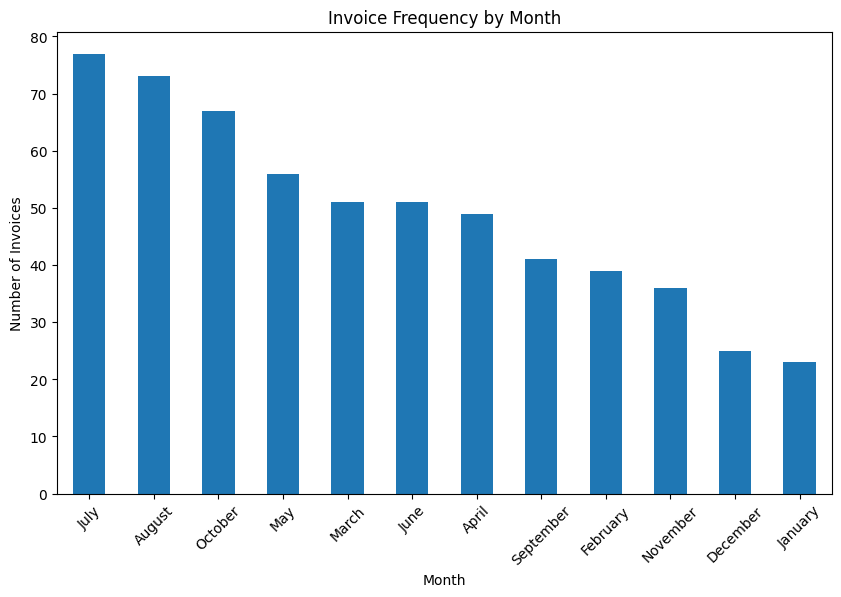

In [21]:
from matplotlib import pyplot as plt

# Grouping data by month and counting the frequency
monthly_aggregate = df['Date'].dt.month.value_counts().sort_values(ascending=False)

# Creating a mapping for month names
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
monthly_aggregate.index = monthly_aggregate.index.map(month_names)

# Plotting the frequency of invoices by month
plt.figure(figsize=(10, 6))
monthly_aggregate.plot(kind='bar')
plt.title('Invoice Frequency by Month')
plt.xlabel('Month')
plt.ylabel('Number of Invoices')
plt.xticks(rotation=45)
plt.show()
